In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stylia as st

datapath = "../data"
outpath = "../output"

In [2]:
# Load CSV files containing the different drug lists

arv = pd.read_csv(os.path.join(datapath, "raw", "arv_drugs.csv"))
tb = pd.read_csv(os.path.join(datapath, "raw","mtb_drugs.csv"))
coad = pd.read_csv(os.path.join(datapath, "raw", "coad_drugs.csv"))

In [3]:
df = pd.concat((arv, tb, coad))
df

,name,smiles,indication
0,abacavir,C1CC1NC2=C3C(=NC(=N2)N)N(C=N3)C4CC(C=C4)CO,hiv
1,amprenavir,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2CCOC2)O)S(=...,hiv
2,atazanavir,CC(C)(C)C(C(=O)NC(CC1=CC=CC=C1)C(CN(CC2=CC=C(C...,hiv
3,cabotegravir,C[C@H]1CO[C@H]2N1C(=O)C3=C(C(=O)C(=CN3C2)C(=O)...,hiv
4,darunavir,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2COC3C2CCO3)...,hiv
...,...,...,...
53,Canrenone,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,other
54,Prednisolone,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,other
55,Propranolol,CC(C)NCC(O)COc1cccc2ccccc12,other
56,7α-thiomethylspironolactone,CS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@]3(C)...,other


In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

#  As defined by descriptastorus
RDKIT_PROPS = {
    "1.0.0": [
        "BalabanJ", "BertzCT", "Chi0", "Chi0n","Chi0v","Chi1","Chi1n","Chi1v", "Chi2n", "Chi2v", "Chi3n", "Chi3v", "Chi4n",
        "Chi4v", "EState_VSA1", "EState_VSA10", "EState_VSA11","EState_VSA2","EState_VSA3", "EState_VSA4","EState_VSA5",
        "EState_VSA6","EState_VSA7","EState_VSA8","EState_VSA9","ExactMolWt", "FpDensityMorgan1", "FpDensityMorgan2",
        "FpDensityMorgan3", "FractionCSP3","HallKierAlpha","HeavyAtomCount", "HeavyAtomMolWt","Ipc","Kappa1","Kappa2",
        "Kappa3","LabuteASA","MaxAbsEStateIndex","MaxAbsPartialCharge","MaxEStateIndex","MaxPartialCharge",
        "MinAbsEStateIndex","MinAbsPartialCharge","MinEStateIndex","MinPartialCharge","MolLogP", "MolMR", "MolWt",
        "NHOHCount","NOCount","NumAliphaticCarbocycles", "NumAliphaticHeterocycles","NumAliphaticRings",
        "NumAromaticCarbocycles", "NumAromaticHeterocycles", "NumAromaticRings","NumHAcceptors","NumHDonors","NumHeteroatoms",
        "NumRadicalElectrons","NumRotatableBonds","NumSaturatedCarbocycles","NumSaturatedHeterocycles","NumSaturatedRings",
        "NumValenceElectrons","PEOE_VSA1","PEOE_VSA10","PEOE_VSA11","PEOE_VSA12","PEOE_VSA13","PEOE_VSA14","PEOE_VSA2",
        "PEOE_VSA3","PEOE_VSA4","PEOE_VSA5","PEOE_VSA6","PEOE_VSA7","PEOE_VSA8","PEOE_VSA9","RingCount","SMR_VSA1","SMR_VSA10",
        "SMR_VSA2","SMR_VSA3","SMR_VSA4","SMR_VSA5","SMR_VSA6","SMR_VSA7","SMR_VSA8","SMR_VSA9","SlogP_VSA1","SlogP_VSA10",
        "SlogP_VSA11","SlogP_VSA12","SlogP_VSA2","SlogP_VSA3","SlogP_VSA4","SlogP_VSA5","SlogP_VSA6","SlogP_VSA7","SlogP_VSA8",
        "SlogP_VSA9","TPSA","VSA_EState1","VSA_EState10","VSA_EState2","VSA_EState3","VSA_EState4","VSA_EState5","VSA_EState6",
        "VSA_EState7","VSA_EState8","VSA_EState9","fr_Al_COO","fr_Al_OH","fr_Al_OH_noTert","fr_ArN","fr_Ar_COO","fr_Ar_N",
        "fr_Ar_NH","fr_Ar_OH","fr_COO","fr_COO2","fr_C_O","fr_C_O_noCOO","fr_C_S","fr_HOCCN","fr_Imine","fr_NH0","fr_NH1",
        "fr_NH2","fr_N_O","fr_Ndealkylation1","fr_Ndealkylation2","fr_Nhpyrrole","fr_SH","fr_aldehyde","fr_alkyl_carbamate",
        "fr_alkyl_halide","fr_allylic_oxid","fr_amide","fr_amidine","fr_aniline","fr_aryl_methyl","fr_azide","fr_azo",
        "fr_barbitur","fr_benzene","fr_benzodiazepine","fr_bicyclic","fr_diazo","fr_dihydropyridine","fr_epoxide","fr_ester",
        "fr_ether","fr_furan","fr_guanido","fr_halogen","fr_hdrzine","fr_hdrzone","fr_imidazole","fr_imide","fr_isocyan",
        "fr_isothiocyan","fr_ketone","fr_ketone_Topliss","fr_lactam","fr_lactone","fr_methoxy","fr_morpholine","fr_nitrile",
        "fr_nitro","fr_nitro_arom","fr_nitro_arom_nonortho","fr_nitroso","fr_oxazole","fr_oxime","fr_para_hydroxylation",
        "fr_phenol","fr_phenol_noOrthoHbond","fr_phos_acid","fr_phos_ester","fr_piperdine","fr_piperzine","fr_priamide",
        "fr_prisulfonamd","fr_pyridine","fr_quatN","fr_sulfide","fr_sulfonamd","fr_sulfone","fr_term_acetylene","fr_tetrazole",
        "fr_thiazole","fr_thiocyan","fr_thiophene","fr_unbrch_alkane","fr_urea","qed",
    ]
}

CURRENT_VERSION = "1.0.0"


class Rdkit2d(object):
    def __init__(self):
        self.name = "rdkit2d"
        self.properties = RDKIT_PROPS[CURRENT_VERSION]
        self._funcs = {name: func for name, func in Descriptors.descList}

    def calc(self, mols):
        R = []
        for mol in mols:
            r = []
            for prop in self.properties:
                r += [self._funcs[prop](mol)]
            R += [r]
        return np.array(R)

smiles = df["smiles"].tolist()
mols = []
for smi in smiles:
    mol = Chem.MolFromSmiles(smi)
    mols.append(mol)

r = Rdkit2d()
fps = r.calc(mols)

### K Means Clustering
We are using the K-means clustering method from sklearn. This method tries to group molecules in N clusters based on their similarity

In [5]:
# STEP 1: Scale
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(fps)
sc_fps=scaler.transform(fps)

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(sc_fps)

/home/gturon/miniconda3/envs/chem/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [7]:
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
df["cluster"]=kmeans.labels_
df

,name,smiles,indication,cluster
0,abacavir,C1CC1NC2=C3C(=NC(=N2)N)N(C=N3)C4CC(C=C4)CO,hiv,1
1,amprenavir,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2CCOC2)O)S(=...,hiv,0
2,atazanavir,CC(C)(C)C(C(=O)NC(CC1=CC=CC=C1)C(CN(CC2=CC=C(C...,hiv,0
3,cabotegravir,C[C@H]1CO[C@H]2N1C(=O)C3=C(C(=O)C(=CN3C2)C(=O)...,hiv,1
4,darunavir,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2COC3C2CCO3)...,hiv,0
...,...,...,...,...
53,Canrenone,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,other,1
54,Prednisolone,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[...,other,1
55,Propranolol,CC(C)NCC(O)COc1cccc2ccccc12,other,1
56,7α-thiomethylspironolactone,CS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@]3(C)...,other,1


In [9]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(sc_fps)
x = pca.transform(sc_fps)
df["comp1"]=x[:,0]
df["comp2"]=x[:,1]

In [10]:
markers = []
for i in df["indication"].tolist():
    if i == "hiv":
        markers +=["o"]
    if i == "mtb":
        markers +=["x"]
    if i == "other":
        markers +=["+"]
        
df["markers"]= markers

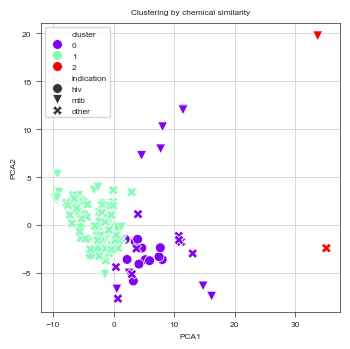

In [11]:
fig, axs = st.create_figure(1,1)
ax = axs.next()
sns.scatterplot(x="comp1", y="comp2", data=df, hue=df["cluster"], style = df["indication"], markers = ["o", "v", "X"], ax=ax, palette="rainbow", s=50)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_title("Clustering by chemical similarity")
st.save_figure(os.path.join(outpath, "plots", "pca_clusters.png"))

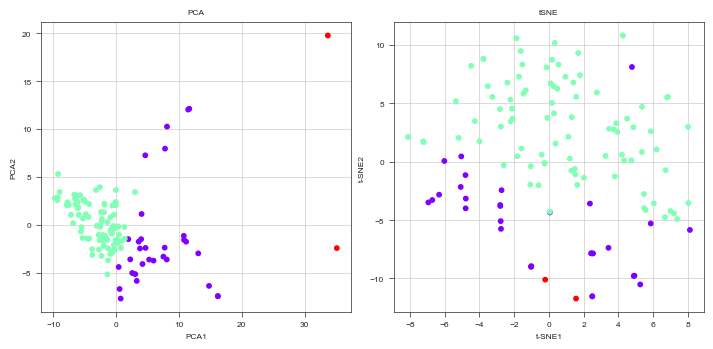

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE()
x2 = tsne.fit_transform(sc_fps)

fig, axs = st.create_figure(1,2)
ax = axs.next()
ax.scatter(df["comp1"].tolist(),df["comp2"].tolist(), c=kmeans.labels_, cmap="rainbow")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_title("PCA")
ax = axs.next()
ax.scatter(x2[:,0], x2[:,1],c=kmeans.labels_, cmap="rainbow")
ax.set_xlabel("t-SNE1")
ax.set_ylabel("t-SNE2")
ax.set_title("tSNE")
st.save_figure(os.path.join(outpath, "plots", "2d_clusters.png"))